<h2 align=center> Principal Component Analysis</h2>

- data is huge , so we have multiple dimensions and multiple features
- so you can convert the higher dimensions into linear dimensions
- so PCA maximizes variance (gives principle omponents) of the data for dimensionality reduction
- in other words, PCA subjects the dataset into a different subspace or feature space

### Task 2: Load the Data and Libraries
---

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [8]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
iris=pd.read_csv('/content/iris.data', header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.columns=["sepal_length","sepal_width","petal_length","petal_width",'species']#naming columns
iris.dropna(how='all', inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Task 3: Visualize the Data
---

best practise to visualize your data before choosing and implementing learning algorithms

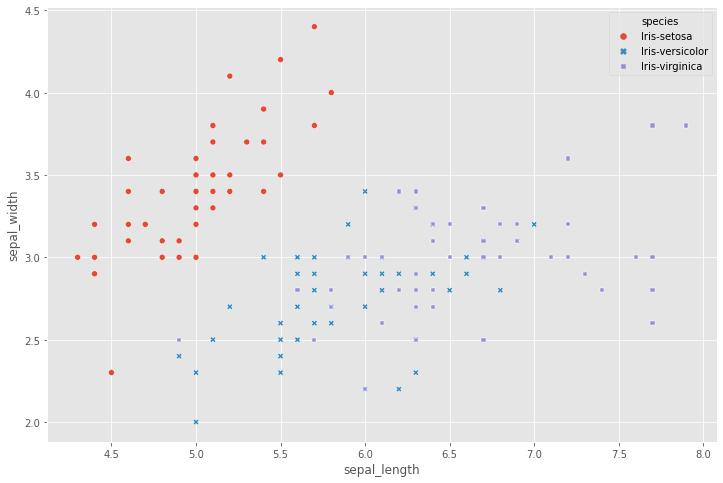

In [15]:
sns.scatterplot(x=iris.sepal_length,y=iris.sepal_width,hue=iris.species,style=iris.species)
#difficult to distinguish versicolor and virginica here :(

## **STEPS FOR PCA**

### Task 4: Standardize the Data
---

In [16]:
#feature matrix
x=iris.iloc[:,0:4].values
#target vector
y=iris.species.values

In [18]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)
#The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [19]:
covariance_matrix=np.cov(x.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [22]:
eigen_values, eigne_vectors=np.linalg.eig(covariance_matrix)
print( eigne_vectors) 
print(eigen_values)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
[2.93035378 0.92740362 0.14834223 0.02074601]


### Task 6: Singular Value Decomposition (SVD)
---
-an alternative to the above
-widely used application of PCA is dimensionality reduction

In [24]:
eigen_vec_svd,s,v=np.linalg.svd(x.T)
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

### Task 7: Picking Principal Components Using the Explained Variance
---

In [25]:
for i in eigen_values:
  print(i)

2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


In [29]:
variance_explained=[(i/sum(eigen_values))*100 for i in eigen_values]
variance_explained

[72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]

In [30]:
cumulative_variance=np.cumsum(variance_explained)
cumulative_variance

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

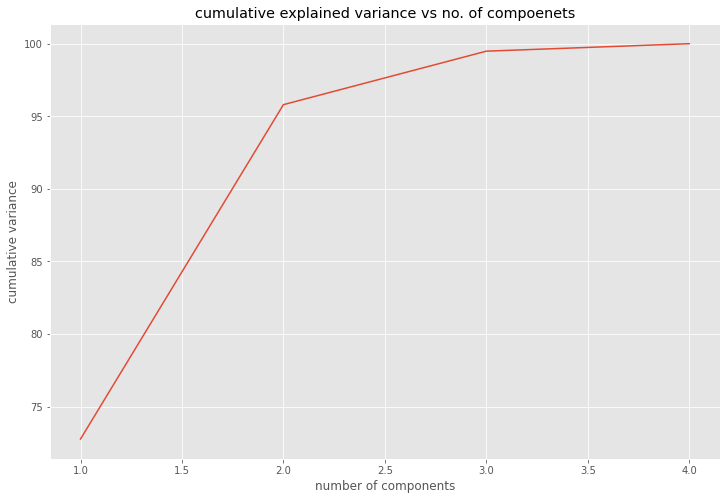

In [31]:
sns.lineplot(x=[1,2,3,4], y=cumulative_variance)
plt.xlabel("number of components")
plt.ylabel("cumulative variance")
plt.title("cumulative explained variance vs no. of compoenets")
plt.show()

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

In [33]:
eigne_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [34]:
projection_matrix=(eigne_vectors.T[:][:])[:2].T
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [35]:
x_pca=x.dot(projection_matrix)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


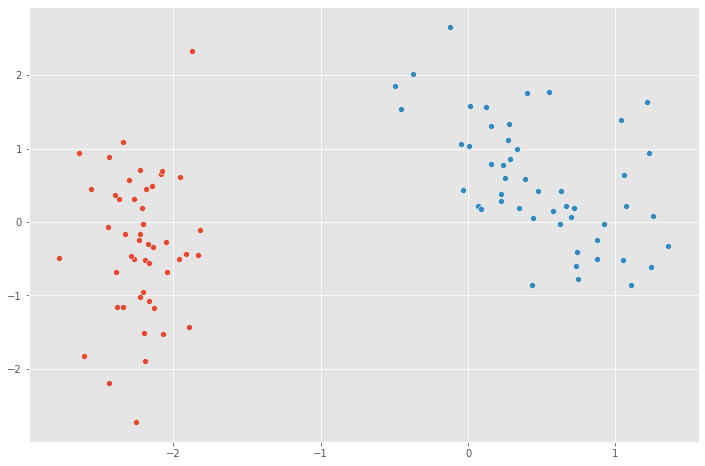

In [36]:
for species in ['Iris-setosa','Iris-versicolor','iris-vriginica']:
  sns.scatterplot(x_pca[y==species,0],
                  x_pca[y==species,1])